In [1]:
"""imports:"""
from  random import randint ,choice ,random ,choices , sample
import numpy as np
import copy 
from math import floor
import math
from sympy import sympify
import matplotlib.pyplot as plt
# from sklearn.metrics import mean_squared_error
# from math import inf
# import pysnooper

In [2]:
"""global variables:"""
unary_operators_list =list(["sin" , "cos" , "tan" , "exp" ])
binary_operators_list =list(["+" , "-" , "/" , "*" , "**"])

"""user's values:"""
operators_list =["+" , "-" ]*5 +\
[ "*" ]* 4 +\
["/"] *4+\
[ "sin" ,"cos" ]*3 +\
[ "**"  ]*0 +\
[ "tan"  , "exp"]*0   #user can change the quantity of operators based on function determination of complexity.
users_variables = ["x"]             #what variables our function does have
min_operatos_num = 1                #determine how many operators do we need in our function(create n operators between these 2 variables.)
max_operatos_num =7
variable_or_constant_factor = 0.3   #a factor that determines to use constant or a variale in leaf node of the tree .the closer value to 0 the more constants will appear in your function.(must be between 0 and1)
depth_or_breadth_factor = 0.5       #a factor that determines to fill both sides of the operator on not. the more closer to 0 tree will get filled in breadth not depth. (must be between 0 and1)
                                    # for example: closer to 0: (((x*10)+2)-5)/3      closer to 1: ((x*10)+2) - ((x-5)\3)
min_constant_limit = 0              #determine that constants must be in what period.
max_constant_limit =50            
num_of_population_in_a_gen = 100     #how many trees should be included in each generation.
num_of_gens =30                      #how many geneerations should be excluded
mutate_factor = 0.05                 #possiblty of mutate in children  form crossover
"""function values:"""
sample_values = {                   #user must enter some values in spots to 
    "x" : [i for i in range(0 , 10)] ,
    # "x": [[x]for x in np.arange(0,10,0.1)] , 
    "outputs" : []        #can be skipped with replacing function in function below.
}
real_function_str = "x**3 + 33"     #what function is.

In [3]:
def fill_sample_output(func_str = real_function_str):   
    """funtion to  fill sample["output"] for 1 variable:"""
    temp_list = []
    for x_val in sample_values["x"]:
        temp_str = func_str.replace("x" , str(x_val))
        # temp_val =eval(temp_str)
        temp_val = sympify(temp_str)
        temp_list.append(temp_val)
    sample_values["outputs"]  =temp_list

In [55]:
fill_sample_output()

In [5]:
class Node():
    def __init__(self , value=None , used=0, father=None , right=None ,left=None , depth = 0 ):
        self.father =father
        self.right = right
        self.left = left
        self.depth =depth
        self.used = used
        self._value = value
        self.is_op()
        self.is_binary_op()
    
    def set_random_op(self):
        new_value= choice(operators_list)                
        self.value=new_value 
    def is_binary_op(self):
        self.is_binary = self.value in binary_operators_list
    def is_op(self  ):
        self.is_operator = self.value in operators_list
    
    @property
    def value(self):
        return self._value 
    @value.setter
    def value(self, new_value=None):
        self._value = new_value
        self.is_operator = new_value in operators_list
        self.is_binary = new_value in binary_operators_list

    def __repr__(self) -> str:
        return f"(V:{self.value} L:{self.left} R:{self.right})"
    def __str__(self) -> str:
        if self.left == None and self.right==None :                                          #constant or variable
            return str(self.value)
        elif self.value in binary_operators_list:                                            #binary operator
            return  f"({self.left} {self.value} {self.right})"
        else:                                                                                #unary operator                                        
            return f"{self.value} ({self.left}) "

In [6]:

class Tree():
    def __init__(self ,  root:Node , nodes:list , fitness = None ):
        self.root = root 
        self.nodes = list(nodes)
        self.fitness = fitness
    def remove_node(self , node:Node):  #note that should handle node's father outside of this function 
        if node.left==None:
            self.nodes.remove(node)
            pass
        else:
            self.nodes.remove(node)
            self.remove_node(node.left)
            self.remove_node(node.right) 
    
    def add_node(self , node:Node): #note that should handle node's father outside of this function
        if node.left==None:
            self.nodes.append(node)
            pass
        else:
            self.nodes.append(node)
            self.add_node(node.left)
            self.add_node(node.right)
        
    def replace_node(self ,node_to_replace:Node , node_that_will_be:Node):  
        father_node = node_to_replace.father
        target_node = copy.deepcopy(node_that_will_be)
        target_node.father = father_node
        if not father_node=="is_root": 
            if father_node.right==node_to_replace :
                father_node.right = target_node
            else:
                father_node.left = target_node
        else:
            self.root = target_node
            
        for node in self.nodes:
            if node == node_to_replace:
                self.remove_node(node)
        self.add_node(target_node)
        
    def mutate(self):
        # print("Mutated!!!")                                                                       #>>>for debugging
        node = choice(self.nodes)
        # if node.value in binary_operators_list:#binary operator
        #     node.value = choice(binary_operators_list)
        # elif node.value in unary_operators_list :#unary operator
        #     node.value = choice(unary_operators_list)
        # else :#variable or constatnt
        #     if random()>0.2:
        #         node.value = randint(min_constant_limit ,max_constant_limit)
        #     else:
        #         node.value = choice(users_variables)
        # if node.is_binary:#binary operator
        #     node.value = choice(binary_operators_list)
        # elif node.is_operator :#unary operator
        #     node.value = choice(unary_operators_list)
        # else :#variable or constatnt
        #     if random()>0.2:
        #         node.value = randint(min_constant_limit ,max_constant_limit)
        #     else:
        #         node.value = choice(users_variables)    
        if node.left==None:
            if random()>0.2:
                node.value = randint(min_constant_limit ,max_constant_limit)
            else:
                node.value = choice(users_variables)
        else:
            node.value = choice(operators_list)    
    
    def evaluate(self  ,node:Node = None , x_val =0 ):
        try:
            if node == None:
                node = self.root
            if node.is_binary :                                                #**note that it doesnt work on unary operators yet!
                if node.value =="+":    
                    return np.add(self.evaluate(node = node.left , x_val=x_val) , self.evaluate(node = node.right , x_val=x_val))
                elif node.value == "-" :
                    return np.subtract(self.evaluate(node = node.left , x_val=x_val) , self.evaluate(node = node.right , x_val=x_val))
                elif node.value =="/":
                    right_eval = self.evaluate(node = node.right, x_val=x_val) 
                    if right_eval < 0.00001:    
                        return randint(0,1000000)
                    else:
                        return np.divide(self.evaluate(node = node.left , x_val=x_val) ,right_eval) 
                elif node.value == "*":
                    return np.multiply(self.evaluate(node = node.left , x_val=x_val) , self.evaluate(node = node.right , x_val=x_val))
                elif node.value == "**":
                    return np.power(self.evaluate(node = node.left , x_val=x_val) , self.evaluate(node = node.right , x_val=x_val))
            elif node.is_operator :
                if node.value == "sin":
                    return np.sin(self.evaluate(node = node.left , x_val=x_val))
                elif node.value == "cos":
                    return np.cos(self.evaluate(node = node.left , x_val=x_val))
                elif node.value == "tan":
                    return np.tan(self.evaluate(node = node.left , x_val=x_val))
                elif node.value == "exp":
                    return np.exp(self.evaluate(node = node.left , x_val=x_val))
            else:
                if node.value not in users_variables:
                    return np.single(node.value)
                else:
                    return np.single(x_val)
            
                                    
            # if node.is_operator and node.is_binary :                                                #**note that it doesnt work on unary operators yet!
            #     if node.value =="+":    
            #         return (self.evaluate(node = node.left , x_val=x_val) + self.evaluate(node = node.right,x_val=x_val))
            #     elif node.value == "-" :
            #         return (self.evaluate(node = node.left ,x_val=x_val) - self.evaluate(node =  node.right ,x_val=x_val))
            #     elif node.value =="/":
            #         return (self.evaluate(node = node.left ,x_val=x_val) / self.evaluate(node = node.right,x_val=x_val))
            #     elif node.value == "*":
            #         return (self.evaluate(node = node.left ,x_val=x_val) * self.evaluate(node = node.right,x_val=x_val))
            #     elif node.value == "**":
            #         return pow(self.evaluate(node = node.left,x_val=x_val) ,  self.evaluate(node = node.right,x_val=x_val))
            # else:
            #     if node.value not in users_variables:
            #         # return np.single(node.value)
            #         return float(node.value)
            #     else:
            #         return float(x_val)
        except ZeroDivisionError:
            print("handles from Tree.evaluate.")
            return -666
    
                
    def __repr__(self) -> str:
        return f"tree[ {self.root} ] "
    def __str__(self) -> str:
        return f"{self.root}"

In [7]:
def create_random_tree():
    """a function that creates a random tree based on user's variables and factors"""
    num_of_ops = randint(min_operatos_num , max_operatos_num)
    unattached_nodes =list([Node() for _ in range(num_of_ops-1)])
    root_node = Node(father="is_root",used=0 ,depth=0,value=choice(operators_list))          
    attached_nodes= list([root_node])                                                                       #a node gets attached when it has a parent

    # creating a random tree with operators:
    # print("test r:",root_node ,"n.o.o:",num_of_ops , "a:", attached_nodes , "u:" , unattached_nodes )     #>>>for logging
    while unattached_nodes !=[]:
        # print("***first loop")                                                                            #>>>for logging
        node =choice(attached_nodes)
        if node.used == 0:                                                                                  #node is binary operator.
            if node.value == None:                                                                          #sometimes it is already set in previous loop.
                node.value = choice(operators_list)            
            if node.value in binary_operators_list:
                if random()< depth_or_breadth_factor and len(unattached_nodes)>1:                           #fill both childs
                    child1 = unattached_nodes.pop()
                    child2 = unattached_nodes.pop()
                    child1.set_random_op()
                    child2.set_random_op()
                    node.left =child1
                    node.right =child2
                    child2.depth , child1.depth =node.depth +1,node.depth +1
                    child1.father , child2.father = node  , node
                    node.used = 1
                    attached_nodes.append(child1)
                    attached_nodes.append(child2)
                else:                                                                                       #fill one child
                    child = unattached_nodes.pop()
                    child.set_random_op()
                    if random()<0.5:
                        node.left = child
                    else:
                        node.right = child
                    child.depth =node.depth +1
                    node.used =1
                    child.father = node
                    attached_nodes.append(child)
            else:                                                                                          #node is unary operator.
                child = unattached_nodes.pop()
                child.set_random_op()
                node.left =child
                child.depth =node.depth +1
                node.used=1
                child.father = node
                attached_nodes.append(child)
    # print("after op nodes set: a:" ,attached_nodes ,"u:",unattached_nodes )                              #>>>for logging
    new_attached_nodes = []

    # adding values and constants to leaf nodes
    for node in attached_nodes:
        # print("in second loop; a:" ,attached_nodes ,"u:",unattached_nodes )                              #>>>for logging
        if node.right ==None :                                                                             #right node is empty  
            choose_const_or_var = random()                                                                 # **note:think that it woulld get into troubles when it comes to unary operators.
            if  choose_const_or_var>variable_or_constant_factor:                                           #fill with constant
                temp_value = randint(min_constant_limit , max_constant_limit)                                                           
                temp_node = Node(value=temp_value ,father=node , depth=node.depth+1)                        
                node.right = temp_node
                new_attached_nodes.append(temp_node)
            else:                                                                                          #fill with variable                                  
                temp_value = choice(users_variables)
                temp_node = Node(value=temp_value ,father=node , depth=node.depth+1)
                node.right = temp_node
                new_attached_nodes.append(temp_node)
        if node.left ==None :                                                                              #left node is empty
            choose_const_or_var = random()
            if choose_const_or_var>variable_or_constant_factor:                                            #fill with constant
                temp_value = randint(min_constant_limit , max_constant_limit)
                temp_node = Node(value=temp_value ,father=node , depth=node.depth+1)
                node.left = temp_node
                new_attached_nodes.append(temp_node)
            else:                                                                                          #fill with variable                                  
                temp_value = choice(users_variables)
                temp_node = Node(value=temp_value ,father=node , depth=node.depth+1)
                node.left = temp_node
                new_attached_nodes.append(temp_node)
    nodes  = list(attached_nodes + new_attached_nodes)
    # print("len:",len(nodes),"nodes:",nodes)   \n",                                                       #>>>for logging
    temp_tree = Tree(root= root_node ,nodes = nodes)
    # print( "at last a:" ,attached_nodes ,"u:",unattached_nodes )                                         #>>>for logging
    
    return temp_tree

In [8]:
def create_generation(num_of_population =num_of_population_in_a_gen ):
    """create the genaration from create_random_tree() with custom number of population."""
    trees_list_this_gen = []
    for i in range(num_of_population):
        temp_tree = create_random_tree()
        trees_list_this_gen.append(temp_tree)
    return trees_list_this_gen

In [9]:
def crossover(tree1:Tree ,tree2:Tree ):
    """a function that produces 2 children from 2 trees and rarely mutate them."""
    child_1 = copy.deepcopy(tree1)
    child_2 = copy.deepcopy(tree2)
    node_1 = choice(child_1.nodes)
    node_2 = choice(child_2.nodes)
    # print(node_1, node_2)
    child_1.replace_node(node_to_replace= node_1  , node_that_will_be=node_2)
    child_2.replace_node(node_to_replace= node_2 , node_that_will_be=node_1)
    if random()<mutate_factor or str(child_1)==str(tree1) or str(child_1)==str(tree2):
        child_1.mutate()
    if random()<mutate_factor or str(child_1)==str(tree1) or str(child_1)==str(tree2):
        child_2.mutate()
    return child_1 , child_2   


In [10]:
def roulette_wheel_selection(population , num=1 , replacing = False):

    # Computes the totallity of the population fitness
    population_fitness = sum([chromosome.fitness for chromosome in population])
    
    # Computes for each chromosome the probability 
    chromosome_probabilities = [chromosome.fitness/population_fitness for chromosome in population]
    
    # Selects one chromosome based on the computed probabilities
    # print("*",population )
    return np.random.choice(population ,p=chromosome_probabilities , replace=replacing, size=num)


def roulette_wheel_selection_negative(population , num=1 , replacing=False):

    # Computes the totallity of the population fitness
    population_fitness = sum([chromosome.fitness for chromosome in population])
    # max_fitness = max([chromosome.fitness for chromosome in population])
    
    # Computes for each chromosome the probability 
    chromosome_probabilities = [chromosome.fitness/population_fitness for chromosome in population]
    
    # Making the probabilities for a minimization problem
    chromosome_probabilities = 1 - np.array(chromosome_probabilities)
    
    # Selects one chromosome based on the computed probabilities
    return np.random.choice(population  , p=chromosome_probabilities ,replace=replacing , size=num)

In [11]:
def find_outputs_of_tree(tree:Tree):
    """a function that returns a list of answers of the tree in a list format. (uses for one tree)"""
    answers_list = []
    for x_val in sample_values["x"]:
        try:
            func_str =  str(tree).replace("x" ,str(x_val))
            # func_str =str(sympify(func_str))
            # temp_ans = eval(func_str)
            temp_ans = tree.evaluate(x_val=float(x_val) , node = tree.root)
            temp_ans = 666 if temp_ans== -np.inf or temp_ans==np.inf else temp_ans                                  #** note that it will replece +-inf with some constant value. 
            answers_list.append(temp_ans)
            # print("for logging:" , tree ,"|||",x_val , answers_list )                                               #>>>for logging
        except ZeroDivisionError:                   #because of division by zero error used this exception.
            answers_list.append(0)
        except :
            answers_list.append(0)
            # print("ambigues exception was : ", func_str  )
            # print(answers_list," , ",type(answers_list[0]))
    return answers_list

In [12]:
def find_fitness_1(functions_answers , real_answers=sample_values["outputs"]):
    """a function that returns fitness of a tree . the real function is saved in a global dictionary named sample_values["outpusts"] . fitness is 1/MSE"""
    try:
        mse =   np.square(np.subtract(real_answers , functions_answers)).mean()
        fitness = np.divide(np.single(1) ,mse)  # 1/MSE   
    except :   
        fitness=666
        print("exception was for this->\nfunction's answers : " ,functions_answers ,"\nreal answers:",real_answers ,"\n" )
    return fitness 


def find_fitness_2(functions_answers , real_answers=sample_values["outputs"]):
    """a function that returns fitness of a tree . the real function is saved in a global dictionary named sample_values["outpusts"] . fitness is -MSE"""
    try:
        fitness = np.single( np.multiply(-1 ,  np.square(np.subtract(real_answers , functions_answers)).mean()))  # -MSE
    except :   
        fitness=-666
        print("exception was for this->\nfunction's answers : " ,functions_answers ,"\nreal answers:",real_answers ,"\n" )                                                                                 
    return fitness 


In [13]:
def shift_fitness(f_list:list , trees:list):
    # max_f = np.max(f_list)
    min_f = np.min(f_list)
    for tree in trees:
        trees_f=tree.fitness 
        # tree.fitness = np.add(trees_f ,min_f)
        tree.fitness = np.subtract(trees_f , min_f)


In [14]:
"""cell that handles the crossovers with functions that defined. """
def genetic_algotihm():
    
    trees_in_gen = create_generation()                                                                               #first generation
    # for gen in range(1):
    for gen in range(num_of_gens):
        fitness_list = np.array([])   

        for tree in trees_in_gen:
            trees_func_answers = find_outputs_of_tree(tree)
            tree.fitness = find_fitness_2(trees_func_answers)
            if tree.fitness == 0.0:
                return tree
            fitness_list=np.append(fitness_list ,[tree.fitness])
        shift_fitness(fitness_list , trees_in_gen)                                                                         #for shifting fitnesses by minimum number of fitnesses                  


        trees_in_gen =  sorted(trees_in_gen,  key = lambda x: x.fitness )
        fitness_list = sorted(fitness_list)
        
        print(*[[tree ,tree.fitness] for tree in trees_in_gen] , sep="\n")                                                  ##>>>for logging
        

        # del fitness_list[:floor(0.2*num_of_population_in_a_gen)]
        # del trees_in_gen[:floor(0.2*num_of_population_in_a_gen)]
        
        new_gen = np.array([])
        
        parents_who_survive = trees_in_gen[-floor(0.2*num_of_population_in_a_gen):]
        new_gen = np.append(new_gen, parents_who_survive)
        
        for _ in range(floor(0.35*num_of_population_in_a_gen)):
            tree_1 ,tree_2= roulette_wheel_selection(population= trees_in_gen , num=2  ,replacing = False)
            child_1 , child_2 = crossover(tree_1 , tree_2)
            # print(tree_1 , tree_2 , "-->")                                                                                ##>>>for logging
            # print(child_1 , child_2 , "<--\n")
            new_gen = np.append(new_gen , child_1)
            new_gen = np.append(new_gen , child_2)
            
        new_commers_num = num_of_population_in_a_gen - len(new_gen)   
        if new_commers_num>0:
            new_commers =  create_generation(new_commers_num)
            new_gen =np.append(new_gen ,  new_commers)
        
        # print(*[[tree ,tree.fitness] for tree in trees_in_gen] , sep="\n")                                                  ##>>>for logging
        print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
        print("gen No.{}:".format(gen+1))
        # print("top trees:" , *[[tree ,tree.fitness] for tree in trees_in_gen[-20:]] , sep="\n")                                  
        print("top of gen:" , trees_in_gen[-1])
        # print("differnce of good fitnesses:",trees_in_gen[-1].fitness - trees_in_gen[-20].fitness)
        # print("len gen: " , len(trees_in_gen) )
        print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

        if gen == num_of_gens-1:
            found_tree = copy.deepcopy(trees_in_gen[-1])
            return found_tree
        del trees_in_gen
        trees_in_gen =copy.deepcopy( new_gen )
        del new_gen


# Testing functions and stuffs:
---------


In [15]:
x_tree = genetic_algotihm()

[tree[ (31 / (x - x)) ] , 0.0]
[tree[ (31 / (sin (((37 / 28) + sin (41) ))  - x)) ] , 84046413824.0]
[tree[ ((29 + 48) / ((cos (9)  / 3) / (30 - x))) ] , 111891644416.0]
[tree[ (cos (sin (((12 - 4) + x)) )  / sin ((49 / x)) ) ] , 144853614592.0]
[tree[ (sin (x)  / (33 - 35)) ] , 161791852544.0]
[tree[ (12 / ((x - 8) - cos ((47 + 7)) )) ] , 170211737600.0]
[tree[ (((sin (x)  / sin ((x - 41)) ) - 15) - (15 + 30)) ] , 245256437760.0]
[tree[ ((x / 36) / (x - 34)) ] , 301220962304.0]
[tree[ ((26 / x) + (x / 9)) ] , 357404889088.0]
[tree[ ((x / 24) / x) ] , 374658150400.0]
[tree[ (((28 - 29) + 19) * ((x * 37) * (31 + 9))) ] , 381700831232.0]
[tree[ (((10 * 38) / (x / (49 * 8))) + 38) ] , 397772809216.0]
[tree[ (cos (44)  / (x * 41)) ] , 400647315200.0]
[tree[ (x * (50 * (16 * x))) ] , 400876902656.0]
[tree[ ((((49 - x) * 26) + x) * 24) ] , 401069719616.0]
[tree[ (x * (49 * 37)) ] , 401749797472.0]
[tree[ ((9 - (22 + 36)) * (46 - x)) ] , 401832326133.5]
[tree[ (21 * ((sin (4)  * (25 * (29 + 1

In [39]:
print (x_tree)

(x * (x * x))


In [80]:
print("i:        my output:      real output:")
print("======================================")
for i in range(10):
    print(f"{i}         {x_tree.evaluate(x_val=i , node = x_tree.root)}             ",sample_values["outputs"][i]  )

i:        my output:      real output:
0         0.0              33
1         1.0              34
2         8.0              41
3         27.0              60
4         64.0              97
5         125.0              158
6         216.0              249
7         343.0              376
8         512.0              545
9         729.0              762


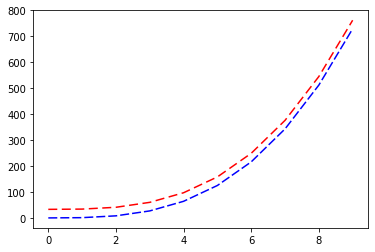

In [92]:
# def f():
#     real_function_str
# X = [[x] for x in np.arange(0, 10, 0.1)]
# X = [[x] for x in range(0,10)]
# ls = list(sample_values["x"] )
my_y = [x_tree.evaluate(x_val=i , node = x_tree.root) for i in range(0,10) ]
# real_y = [[x_tree.evaluate(x[0])] for x in X]

plt.plot([i for i in range(0,10)]  , my_y, color='b', dashes=[6, 2])
plt.plot( sample_values["x"], sample_values["outputs"], color='r', dashes=[6, 3])
plt.show()